# K-means Clustering

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Import Data
df_RUN_19 = pd.read_excel('test_data/RUN_19_TO_21_CLEANED.xlsx')
df_RUN_21 = pd.read_excel('test_data/RUN_19_TO_21_CLEANED.xlsx',sheet_name='Run 21')
df_RUN_13 = pd.read_excel('test_data/RUN_13_TO_15_CLEANED.xlsx')

run_13 = df_RUN_13[3:]
run_13

,Unnamed: 0,Element ID,zigbee:21_zd_Temp,zigbee:24_zd_Hz,zigbee:24_zd_WHr_O,zigbee:20_zd_Temp,zigbee:24_zd_VCA,zigbee:24_zd_IN,zigbee:24_zd_VAB,zigbee:3_zd_THUM1_RelHum,...,zigbee:2_zd_Temp,zigbee:24_zd_VARB,zigbee:24_zd_VARC,zigbee:24_zd_WB,zigbee:29_zd_Temp,zigbee:1_zd_Temp,zigbee:24_zd_WTtl,zigbee:22_zd_Temp,CLASSIFICATION,CONNECTED SOURCES
3,13,2023-10-05 13:20:00,34.4,NaN,NaN,35.1,NaN,NaN,NaN,0.553,...,24.9,NaN,NaN,NaN,NaN,23.1,NaN,33.2,NORMAL,NaN
4,13,2023-10-05 13:21:00,34.4,NaN,NaN,35.1,NaN,NaN,NaN,0.5537,...,24.9,NaN,NaN,NaN,NaN,23,NaN,33.2,NORMAL,NaN
5,13,2023-10-05 13:22:00,34.8,NaN,NaN,35.8,NaN,NaN,NaN,0.5537,...,24.9,NaN,NaN,NaN,NaN,23,NaN,33.8,NORMAL,NaN
6,13,2023-10-05 13:23:00,34.8,NaN,NaN,35.8,NaN,NaN,NaN,0.5525,...,24.9,NaN,NaN,NaN,NaN,23,NaN,33.8,NORMAL,NaN
7,13,2023-10-05 13:24:00,35.2,NaN,NaN,36.5,NaN,NaN,NaN,0.5525,...,24.9,NaN,NaN,NaN,NaN,22.8,NaN,34.5,NORMAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,13,2023-10-06 15:26:00,75.1,NaN,NaN,74.8,NaN,NaN,NaN,0.3298,...,32.1,NaN,NaN,NaN,NaN,24.1,NaN,72.1,TORQUE DEFECT CONECTOR TERMINALS,NaN
1570,13,2023-10-06 15:27:00,75.1,NaN,NaN,74.8,NaN,NaN,NaN,0.3298,...,32.1,NaN,NaN,NaN,NaN,24.1,NaN,72.1,TORQUE DEFECT CONECTOR TERMINALS,NaN
1571,13,2023-10-06 15:28:00,75.1,NaN,NaN,74.8,NaN,NaN,NaN,0.3278,...,32.1,NaN,NaN,NaN,NaN,24.1,NaN,72.1,TORQUE DEFECT CONECTOR TERMINALS,NaN
1572,13,2023-10-06 15:29:00,75.1,NaN,NaN,74.8,NaN,NaN,NaN,0.3274,...,32.1,NaN,NaN,NaN,NaN,24.1,NaN,72.1,TORQUE DEFECT CONECTOR TERMINALS,NaN


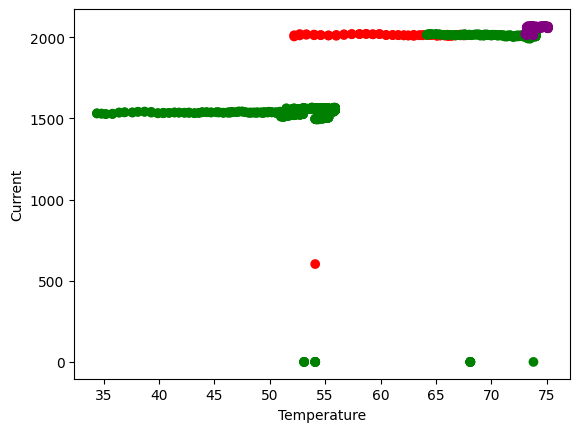

In [14]:
colors = {
    'NORMAL': 'green',
    'TORQUE DEFECT PHASE B': 'red',
    'TORQUE DEFECT CONECTOR TERMINALS': 'purple'
}
colorsList = [colors.get(status[0]) for status in run_13[['CLASSIFICATION']].to_numpy().tolist()]
plt.scatter(run_13[['zigbee:21_zd_Temp']],run_13[['zigbee:24_zd_IA']],color=colorsList)
plt.xlabel('Temperature (C)')
plt.ylabel('Current (A)')
plt.show()


5


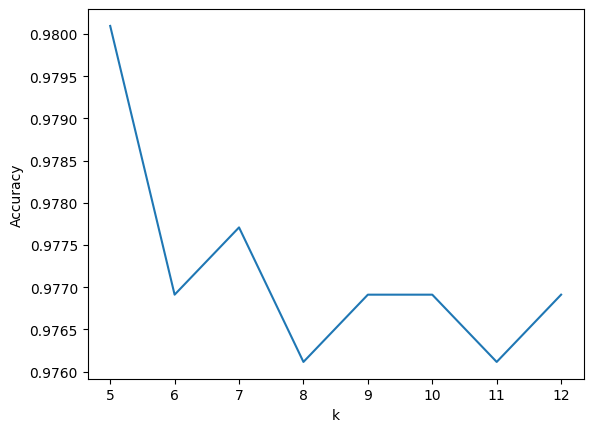

In [16]:
# Splitting Test and Training Data
# Not really the best way to discretize the targets but good enough for a concept
colors = {
    'NORMAL': 0,
    'TORQUE DEFECT PHASE B': 1,
    'TORQUE DEFECT CONECTOR TERMINALS': 2
}
targetList = [colors.get(status[0]) for status in run_13[['CLASSIFICATION']].to_numpy().tolist()]
X_train, X_test, Y_train, Y_test = train_test_split(run_13[['zigbee:21_zd_Temp','zigbee:24_zd_IA']], targetList, test_size=0.2)
cross_value_scores = []

# Neighbors to test / X Axis
neighbors = [5,6,7,8,9,10,11,12]

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)
    avg = np.mean(scores)
    cross_value_scores.append(avg)

best_n_neighbors = neighbors[np.argmax(cross_value_scores)]
print(best_n_neighbors)

# Plotting
fig, ax = plt.subplots()
plt.plot(neighbors,cross_value_scores)
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy")
plt.show()


# Gradient Boosting Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, Y_train, Y_test = train_test_split(run_13[['zigbee:24_zd_IA']], run_13[['zigbee:21_zd_Temp']], test_size=0.2)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


# Neural Networks

In [ ]:
import sklearn.neural_network as sk

model = sk.MLPRegressor(hidden_layer_sizes=(10,10),max_iter=1000)
